# Analysis of Patents and Papers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import re
from datetime import datetime

In [ ]:
# load data from our output result table
df1 = pd.read_csv("/content/drive/MyDrive/AIHeathcare2023/Data_sliced/D1_cleaned_122923.csv", header = 0)
df2 = pd.read_csv("/content/drive/MyDrive/AIHeathcare2023/Data_sliced/D2_cleaned_122923.csv", header = 0)

In [ ]:
# quick look at last five of D1

df1.tail(5)

,TI,AU,AB,DC,Time
924,Mobile device-mountable periscope for dental i...,"['PETERSON A', 'SANCHEZ ALONSO V', 'SANCHEZ A V']",periscope head includes head image information...,"['P31 (Diagnosis, surgery (A61B).)', '', 'S05 ...",2022-10-14
925,Hyperspectral imaging device for home healthca...,"['DARTY M A', 'MEENEN P M', 'FLETCHER J D']",device chassis base face axis orthogonal base ...,"['S03 (Scientific Instrumentation)', 'S05 (Ele...",2022-10-21
926,Computer-implemented autoimmune condition e.g....,"['PURUSHOTHAMAN M', 'SORATHIA A L']",involves receiving data . data received . data...,"['S05 (Electrical Medical Equipment)', 'T01 (D...",2022-11-03
927,Light emitting device useful in electronic dev...,"['SHOZO O', 'MITSURU N', 'RYOSUKE S', 'CHIGUSA...",light emitting device light emitting element e...,['B04 (Natural products and polymers. Includin...,2022-11-11
928,Treating severe acute respiratory syndrome cor...,"['ALEXANDER E', 'YEH W', 'PANG P S', 'HONG D',...",treating severe acute respiratory syndrome cor...,['B04 (Natural products and polymers. Includin...,2022-11-25


In [ ]:
# quick look at last five of D2

df2.tail(5)

,TI,AU,AB,DC,Time
1234,Assessing data gathering of chatbot based symp...,"['Ben-Shabat, N', ' Sharvit, G', ' Meimis, B',...",background burden healthcare system mounting c...,INTERNATIONAL JOURNAL OF MEDICAL INFORMATICS,2022-12-01
1235,Intelligent multi-modal shear wave elastograph...,"['Pfob, A', ' Sidey-Gibbons, C', ' Barr, RG', ...",background breast ultrasound identifies additi...,EUROPEAN JOURNAL OF CANCER,2022-12-01
1236,Computer Vision-Based Kidney's (HK-2) Damaged ...,"['Ghani, A', ' Hodeify, R', ' See, CH', ' Keat...",medical health science detection cell injury p...,ELECTRONICS,2022-12-01
1237,Multi Oral Disease Classification from Panoram...,"['Jaiswal, P', ' Katkar, V', ' Bhirud, SG']",subject oral healthcare crucial research field...,INTERNATIONAL JOURNAL OF ADVANCED COMPUTER SCI...,2022-12-01
1238,A Smart Diseases Diagnosis and Classification ...,"['Alattab, AA', ' Ghaleb, M', ' Olayah, F', ' ...",today 's world healthcare industry face diffic...,JOURNAL OF NANOELECTRONICS AND OPTOELECTRONICS,2022-12-01


In [ ]:
df = df1.copy()

# df['AB'] = df['AB'].apply(str)
# df['AB'] = df['AB'].apply(remove_stopwords)
# df['AB'] = df['AB'].apply(lemmatize_text)
# df['AB'] = df['AB'].apply(ranbix_clean)

# Assuming 'time' is the column containing datetime values
df['time'] = pd.to_datetime(df['Time'])

# Extract the year from the 'time' column
df['year'] = df['time'].dt.year

# Create a dictionary to store DataFrames based on the year
dfs_by_year = {}

# Iterate through unique years and create DataFrames
for year in df['year'].unique():
    dfs_by_year[year] = df[df['year'] == year].copy()

# Save each DataFrame as a CSV file
for year, df_year in dfs_by_year.items():
    filename = f'patent_{year}.csv'
    df_year.to_csv(filename, index=False)
    print(f"DataFrame for {year} saved as {filename}")

for year, df_year in dfs_by_year.items():
    globals()[f'patent_{year}'] = df_year
    globals()[f'patents_{year}'] = df_year.AB.to_list()

DataFrame for 2013 saved as patent_2013.csv
DataFrame for 2014 saved as patent_2014.csv
DataFrame for 2015 saved as patent_2015.csv
DataFrame for 2016 saved as patent_2016.csv
DataFrame for 2017 saved as patent_2017.csv
DataFrame for 2018 saved as patent_2018.csv
DataFrame for 2019 saved as patent_2019.csv
DataFrame for 2020 saved as patent_2020.csv
DataFrame for 2021 saved as patent_2021.csv
DataFrame for 2022 saved as patent_2022.csv


In [ ]:
df = df2.copy()

# df['AB'] = df['AB'].apply(str)
# df['AB'] = df['AB'].apply(remove_stopwords)
# df['AB'] = df['AB'].apply(lemmatize_text)
# df['AB'] = df['AB'].apply(ranbix_clean)

# Assuming 'time' is the column containing datetime values
df['time'] = pd.to_datetime(df['Time'])

# Extract the year from the 'time' column
df['year'] = df['time'].dt.year

# Create a dictionary to store DataFrames based on the year
dfs_by_year = {}

# Iterate through unique years and create DataFrames
for year in df['year'].unique():
    dfs_by_year[year] = df[df['year'] == year].copy()

# Save each DataFrame as a CSV file
for year, df_year in dfs_by_year.items():
    filename = f'paper_{year}.csv'
    df_year.to_csv(filename, index=False)
    print(f"DataFrame for {year} saved as {filename}")

for year, df_year in dfs_by_year.items():
    globals()[f'paper_{year}'] = df_year
    globals()[f'papers_{year}'] = df_year.AB.to_list()

DataFrame for 2013 saved as paper_2013.csv
DataFrame for 2014 saved as paper_2014.csv
DataFrame for 2015 saved as paper_2015.csv
DataFrame for 2016 saved as paper_2016.csv
DataFrame for 2017 saved as paper_2017.csv
DataFrame for 2018 saved as paper_2018.csv
DataFrame for 2019 saved as paper_2019.csv
DataFrame for 2020 saved as paper_2020.csv
DataFrame for 2021 saved as paper_2021.csv
DataFrame for 2022 saved as paper_2022.csv


## Data Deep Clean



In [ ]:
#@markdown #####**Stopwords settings:**

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))

additional_words = ['step', 'first', 'second', 'third', 'description', 'drawing', 'show', 'flowchart', 'method'] #@param{type: 'string'}
additional_words += ["a", "an", "the", "and", "but", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "can", "will", "just"]
additional_words += [
    "E.g", "I.e", "select", "first", "second", "320", "220", "130", "120",
    "if", "DRAWING", "used", "allows", "involves", "comprises", "Includes",
    "Enables", "ensures", "Utilizes", "Generates", "Determine", "Capture",
    "subject", "object", "process", "set", "Comprising", "Relating",
    "Corresponding", "Related", "Relevant", "Retrieving", "Previously",
    "Accordingly", "Selected", "Regarding", "Associated", "Determined",
    "Included", "Executed", "Configured", "Obtains", "Obtained", "Following",
    "Determining", "Generated", "Apparatus", "Individual", "Block Diagram",
    "providing", "provide", "Collecting", "connected",
    "system", "health", "healthcare", "data", "user", "patient", "device",
    "Medical", "test",
    "like", "team", "hi", "hey", "hello"
]

stop_words.update(additional_words)

def remove_stopwords(content):
    # Tokenize the content
    tokens = nltk.word_tokenize(content)

    # Remove stop words
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

    # Join the filtered tokens back into a string
    filtered_content = ' '.join(filtered_tokens)

    return filtered_content


lemmatizer = WordNetLemmatizer()

def lemmatize_text(content):
    tokens = word_tokenize(content)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text


def ranbix_clean(content):
    # Cleaning process
    # 1. Remove patterns like (a), (b), (1), (2), etc.
    cleaned_text = re.sub(r"\(\s*\w*\s*\)", "", content)

    # 2. Remove special symbols
    cleaned_text = re.sub(r"[{};,:-]", "", cleaned_text)

    # 3. Remove specific words like "USE", "INDEPENDENT CLAIMS", "DETAILED DESCRIPTION"
    cleaned_text = re.sub(r"\b(USE|INDEPENDENT CLAIMS|DETAILED DESCRIPTION)\b", "", cleaned_text)

    # 4. Common preprocessing methods:
    #    a. Removing extra spaces
    cleaned_text = re.sub(r"\s+", " ", cleaned_text)
    #    b. Lowercasing
    cleaned_text = cleaned_text.lower()
    #    c. Removing leading and trailing spaces
    cleaned_text = cleaned_text.strip()
    return cleaned_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# df1 = patent, df2 = papers

df = df1
# df = df2

# Apply the remove_stopwords function to the 'AB' column
# Apply the lemmatize_text function to the 'AB' column
# Apply the ranbix_clean function to the 'AB' column

df['AB'] = df['AB'].apply(str)
df['AB'] = df['AB'].apply(remove_stopwords)
df['AB'] = df['AB'].apply(lemmatize_text)
df['AB'] = df['AB'].apply(ranbix_clean)


# patents = df.Content.to_list()
# input_df = patents

# papers = df.Content.to_list()
# input_df = papers

df.to_csv('D1_cleaned_122923.csv', index=False)

In [ ]:
df = df2
df['AB'] = df['AB'].apply(str)
df['AB'] = df['AB'].apply(remove_stopwords)
df['AB'] = df['AB'].apply(lemmatize_text)
df['AB'] = df['AB'].apply(ranbix_clean)
df.to_csv('D2_cleaned_122923.csv', index=False)

In [ ]:
!pip install nltk

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


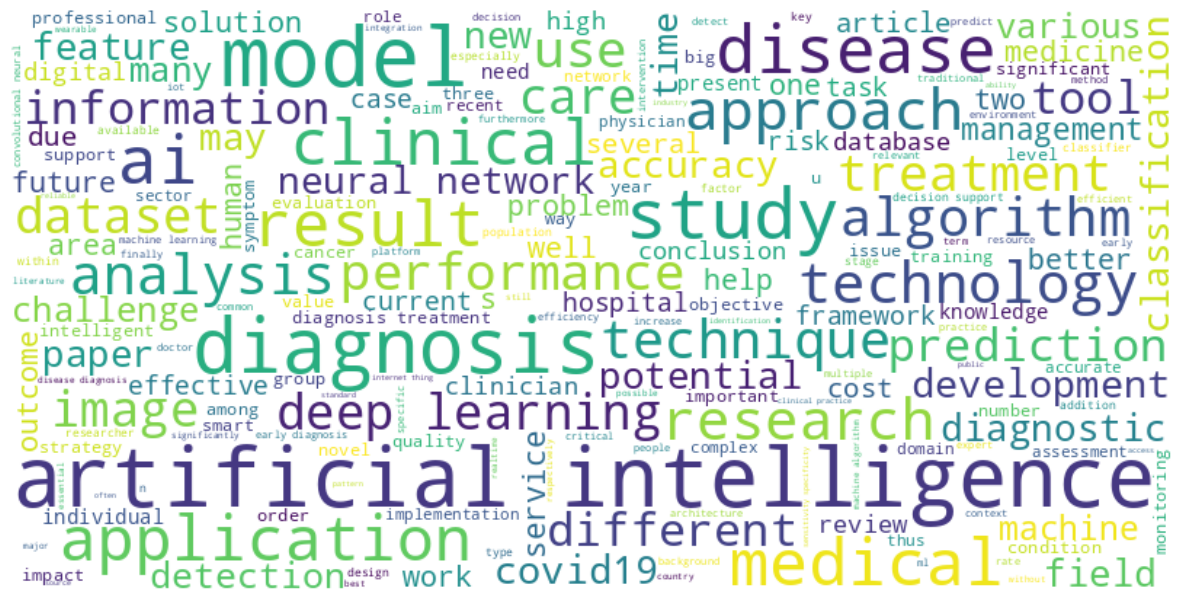

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import pandas as pd
from nltk import pos_tag, word_tokenize

import nltk
nltk.download('averaged_perceptron_tagger')

def remove_verbs(text):
    tokens = word_tokenize(text)
    non_verbs = [word for word, pos in pos_tag(tokens) if not pos.startswith('VB')]
    return ' '.join(non_verbs)

# Apply the function to remove verbs
df['text_no_verbs'] = df['AB'].apply(remove_verbs)

# Combine all text from the DataFrame
text = " ".join(review for review in df.text_no_verbs)

# Generate a high-resolution word cloud image
wordcloud = WordCloud(width = 800, height = 400, background_color="white").generate(text)

# Display the generated image
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Save the image in the img folder
plt.savefig("wordcloud2_test.png", format="png", dpi=300)

plt.show()



## Installing BERTopic

In [ ]:
!pip install bertopic

## Bertopic results

In [ ]:
dfs_by_year[2013]

,TI,AU,AB,DC,Time,time,year
0,Conceptual graph-based knowledge representatio...,"['Kamsu-Foguem, B', ' Diallo, G', ' Foguem, C']",although african patient use conventional mode...,ENGINEERING APPLICATIONS OF ARTIFICIAL INTELLI...,2013-04-01,2013-04-01,2013
1,Prediction of body mass index status from voic...,"['Lee, BJ', ' Kim, KH', ' Ku, B', ' Jang, JS',...",objectives body mass index provides essential ...,ARTIFICIAL INTELLIGENCE IN MEDICINE,2013-05-01,2013-05-01,2013


In [ ]:
# df1 = patent, df2 = papers

df = df1
# df = df2


# Apply the remove_stopwords function to the 'AB' column
# Apply the lemmatize_text function to the 'AB' column
# Apply the ranbix_clean function to the 'AB' column

df['AB'] = df['AB'].apply(str)
df['AB'] = df['AB'].apply(remove_stopwords)
df['AB'] = df['AB'].apply(lemmatize_text)
df['AB'] = df['AB'].apply(ranbix_clean)


patents = df.AB.to_list()

# papers = df.Content.to_list()
# input_df = papers

In [ ]:
from bertopic import BERTopic
from bertopic.vectorizers import ClassTfidfTransformer
from sklearn.cluster import KMeans

topic_model = BERTopic(min_topic_size=2, verbose=True)

In [ ]:
topics, probs = topic_model.fit_transform(patents_2013)
freq = topic_model.get_topic_info()

freq.to_excel('patents_2013.xlsx')

2024-01-07 14:46:17,806 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/3 [00:00<?, ?it/s]

2024-01-07 14:46:32,453 - BERTopic - Embedding - Completed ✓
2024-01-07 14:46:32,460 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-01-07 14:46:34,789 - BERTopic - Dimensionality - Completed ✓
2024-01-07 14:46:34,792 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-01-07 14:46:34,801 - BERTopic - Cluster - Completed ✓
2024-01-07 14:46:34,807 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-01-07 14:46:34,854 - BERTopic - Representation - Completed ✓


In [ ]:
# Assuming you have the necessary libraries and topic_model initialized

# Loop through the years 2013 to 2022
for year in range(2013, 2023):
    # Assuming you have a DataFrame for each year named patents_{year}
    # topics and probs are returned by the topic_model.fit_transform function

    # Your code for fitting the model and obtaining topic information
    topics, probs = topic_model.fit_transform(globals()[f'patents_{year}'])
    freq = topic_model.get_topic_info()

    # Save the frequency information to an Excel file
    freq.to_excel(f'patents_{year}.xlsx')


2024-01-07 14:52:24,651 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/3 [00:00<?, ?it/s]

2024-01-07 14:52:41,915 - BERTopic - Embedding - Completed ✓
2024-01-07 14:52:41,923 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-01-07 14:52:45,756 - BERTopic - Dimensionality - Completed ✓
2024-01-07 14:52:45,759 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-01-07 14:52:45,779 - BERTopic - Cluster - Completed ✓
2024-01-07 14:52:45,794 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-01-07 14:52:45,889 - BERTopic - Representation - Completed ✓
2024-01-07 14:52:46,050 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/3 [00:00<?, ?it/s]

2024-01-07 14:53:03,407 - BERTopic - Embedding - Completed ✓
2024-01-07 14:53:03,409 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-01-07 14:53:06,813 - BERTopic - Dimensionality - Completed ✓
2024-01-07 14:53:06,815 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-01-07 14:53:06,826 - BERTopic - Cluster - Completed ✓
2024-01-07 14:53:06,832 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-01-07 14:53:06,884 - BERTopic - Representation - Completed ✓
2024-01-07 14:53:06,961 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/3 [00:00<?, ?it/s]

2024-01-07 14:53:21,384 - BERTopic - Embedding - Completed ✓
2024-01-07 14:53:21,386 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-01-07 14:53:23,760 - BERTopic - Dimensionality - Completed ✓
2024-01-07 14:53:23,762 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-01-07 14:53:23,777 - BERTopic - Cluster - Completed ✓
2024-01-07 14:53:23,783 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-01-07 14:53:23,829 - BERTopic - Representation - Completed ✓
2024-01-07 14:53:23,907 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/3 [00:00<?, ?it/s]

2024-01-07 14:53:36,938 - BERTopic - Embedding - Completed ✓
2024-01-07 14:53:36,941 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-01-07 14:53:39,316 - BERTopic - Dimensionality - Completed ✓
2024-01-07 14:53:39,318 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-01-07 14:53:39,330 - BERTopic - Cluster - Completed ✓
2024-01-07 14:53:39,336 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-01-07 14:53:39,378 - BERTopic - Representation - Completed ✓
2024-01-07 14:53:39,447 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/3 [00:00<?, ?it/s]

2024-01-07 14:53:52,486 - BERTopic - Embedding - Completed ✓
2024-01-07 14:53:52,490 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-01-07 14:53:54,849 - BERTopic - Dimensionality - Completed ✓
2024-01-07 14:53:54,852 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-01-07 14:53:54,865 - BERTopic - Cluster - Completed ✓
2024-01-07 14:53:54,873 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-01-07 14:53:54,910 - BERTopic - Representation - Completed ✓
2024-01-07 14:53:54,962 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/4 [00:00<?, ?it/s]

2024-01-07 14:54:14,742 - BERTopic - Embedding - Completed ✓
2024-01-07 14:54:14,745 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-01-07 14:54:17,209 - BERTopic - Dimensionality - Completed ✓
2024-01-07 14:54:17,211 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-01-07 14:54:17,225 - BERTopic - Cluster - Completed ✓
2024-01-07 14:54:17,231 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-01-07 14:54:17,295 - BERTopic - Representation - Completed ✓
2024-01-07 14:54:17,388 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/4 [00:00<?, ?it/s]

2024-01-07 14:54:38,195 - BERTopic - Embedding - Completed ✓
2024-01-07 14:54:38,200 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-01-07 14:54:41,299 - BERTopic - Dimensionality - Completed ✓
2024-01-07 14:54:41,301 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-01-07 14:54:41,316 - BERTopic - Cluster - Completed ✓
2024-01-07 14:54:41,322 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-01-07 14:54:41,387 - BERTopic - Representation - Completed ✓
2024-01-07 14:54:41,492 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/5 [00:00<?, ?it/s]

2024-01-07 14:55:02,879 - BERTopic - Embedding - Completed ✓
2024-01-07 14:55:02,883 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-01-07 14:55:06,382 - BERTopic - Dimensionality - Completed ✓
2024-01-07 14:55:06,384 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-01-07 14:55:06,400 - BERTopic - Cluster - Completed ✓
2024-01-07 14:55:06,407 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-01-07 14:55:06,536 - BERTopic - Representation - Completed ✓
2024-01-07 14:55:06,689 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/5 [00:00<?, ?it/s]

2024-01-07 14:55:29,113 - BERTopic - Embedding - Completed ✓
2024-01-07 14:55:29,117 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-01-07 14:55:31,635 - BERTopic - Dimensionality - Completed ✓
2024-01-07 14:55:31,636 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-01-07 14:55:31,649 - BERTopic - Cluster - Completed ✓
2024-01-07 14:55:31,656 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-01-07 14:55:31,720 - BERTopic - Representation - Completed ✓
2024-01-07 14:55:31,814 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-01-07 14:55:37,150 - BERTopic - Embedding - Completed ✓
2024-01-07 14:55:37,152 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-01-07 14:55:40,365 - BERTopic - Dimensionality - Completed ✓
2024-01-07 14:55:40,368 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-01-07 14:55:40,377 - BERTopic - Cluster - Completed ✓
2024-01-07 14:55:40,384 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-01-07 14:55:40,421 - BERTopic - Representation - Completed ✓


In [ ]:
# Assuming you have the necessary libraries and topic_model initialized

# Loop through the years 2013 to 2022
for year in range(2016, 2023):
    # Assuming you have a DataFrame for each year named patents_{year}
    # topics and probs are returned by the topic_model.fit_transform function

    # Your code for fitting the model and obtaining topic information
    topics, probs = topic_model.fit_transform(globals()[f'papers_{year}'])
    freq = topic_model.get_topic_info()

    # Save the frequency information to an Excel file
    freq.to_excel(f'papers_{year}.xlsx')


2024-01-07 14:58:57,860 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-01-07 14:58:59,225 - BERTopic - Embedding - Completed ✓
2024-01-07 14:58:59,229 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-01-07 14:59:02,135 - BERTopic - Dimensionality - Completed ✓
2024-01-07 14:59:02,140 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-01-07 14:59:02,149 - BERTopic - Cluster - Completed ✓
2024-01-07 14:59:02,155 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-01-07 14:59:02,182 - BERTopic - Representation - Completed ✓
2024-01-07 14:59:02,232 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-01-07 14:59:03,602 - BERTopic - Embedding - Completed ✓
2024-01-07 14:59:03,608 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-01-07 14:59:06,785 - BERTopic - Dimensionality - Completed ✓
2024-01-07 14:59:06,787 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-01-07 14:59:06,795 - BERTopic - Cluster - Completed ✓
2024-01-07 14:59:06,802 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-01-07 14:59:06,822 - BERTopic - Representation - Completed ✓
2024-01-07 14:59:06,853 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/2 [00:00<?, ?it/s]

2024-01-07 14:59:13,260 - BERTopic - Embedding - Completed ✓
2024-01-07 14:59:13,264 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-01-07 14:59:16,623 - BERTopic - Dimensionality - Completed ✓
2024-01-07 14:59:16,626 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-01-07 14:59:16,635 - BERTopic - Cluster - Completed ✓
2024-01-07 14:59:16,643 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-01-07 14:59:16,689 - BERTopic - Representation - Completed ✓
2024-01-07 14:59:16,762 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/3 [00:00<?, ?it/s]

2024-01-07 14:59:28,527 - BERTopic - Embedding - Completed ✓
2024-01-07 14:59:28,535 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-01-07 14:59:30,972 - BERTopic - Dimensionality - Completed ✓
2024-01-07 14:59:30,974 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-01-07 14:59:30,985 - BERTopic - Cluster - Completed ✓
2024-01-07 14:59:30,992 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-01-07 14:59:31,034 - BERTopic - Representation - Completed ✓
2024-01-07 14:59:31,092 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/6 [00:00<?, ?it/s]

2024-01-07 15:00:01,700 - BERTopic - Embedding - Completed ✓
2024-01-07 15:00:01,704 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-01-07 15:00:04,654 - BERTopic - Dimensionality - Completed ✓
2024-01-07 15:00:04,661 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-01-07 15:00:04,680 - BERTopic - Cluster - Completed ✓
2024-01-07 15:00:04,687 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-01-07 15:00:04,846 - BERTopic - Representation - Completed ✓
2024-01-07 15:00:05,039 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/13 [00:00<?, ?it/s]

2024-01-07 15:01:09,036 - BERTopic - Embedding - Completed ✓
2024-01-07 15:01:09,042 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-01-07 15:01:13,679 - BERTopic - Dimensionality - Completed ✓
2024-01-07 15:01:13,681 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-01-07 15:01:13,705 - BERTopic - Cluster - Completed ✓
2024-01-07 15:01:13,711 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-01-07 15:01:13,902 - BERTopic - Representation - Completed ✓
2024-01-07 15:01:14,162 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/17 [00:00<?, ?it/s]

2024-01-07 15:02:41,718 - BERTopic - Embedding - Completed ✓
2024-01-07 15:02:41,727 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-01-07 15:02:46,171 - BERTopic - Dimensionality - Completed ✓
2024-01-07 15:02:46,176 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-01-07 15:02:46,223 - BERTopic - Cluster - Completed ✓
2024-01-07 15:02:46,234 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-01-07 15:02:46,627 - BERTopic - Representation - Completed ✓


In [ ]:
from hdbscan import HDBSCAN
hdbscan_model = HDBSCAN(min_cluster_size=15, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

In [ ]:
freq

,Topic,Count,Name,Representation,Representative_Docs
0,0,62,0_patient_system_healthcare_data,"[patient, system, healthcare, data, informatio...",[computer system includes virtual patient modu...
1,1,5,1_cell_level_sample_activatable,"[cell, level, sample, activatable, acid, colon...",[diagnosing colon cancer sample obtained subje...
2,2,3,2_fetal_restenosis_allele_aneuploidy,"[fetal, restenosis, allele, aneuploidy, presen...",[declared unified accelerated highsensitive hi...


In [ ]:
cluster_model = KMeans(n_clusters=20)
topic_model = BERTopic(hdbscan_model=cluster_model, min_topic_size=5, verbose=True)

In [ ]:
# Loop through the years 2013 to 2022
for year in range(2020, 2023):
    # Assuming you have a DataFrame for each year named patents_{year}
    # topics and probs are returned by the topic_model.fit_transform function

    # Your code for fitting the model and obtaining topic information
    topics, probs = topic_model.fit_transform(globals()[f'papers_{year}'])
    freq = topic_model.get_topic_info()

    # Save the frequency information to an Excel file
    freq.to_excel(f'kmeans_papers_{year}.xlsx')

2024-01-07 15:26:23,305 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/6 [00:00<?, ?it/s]

2024-01-07 15:26:51,300 - BERTopic - Embedding - Completed ✓
2024-01-07 15:26:51,303 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-01-07 15:26:55,570 - BERTopic - Dimensionality - Completed ✓
2024-01-07 15:26:55,573 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-01-07 15:26:55,702 - BERTopic - Cluster - Completed ✓
2024-01-07 15:26:55,725 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-01-07 15:26:55,873 - BERTopic - Representation - Completed ✓
2024-01-07 15:26:56,050 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/13 [00:00<?, ?it/s]

2024-01-07 15:27:56,479 - BERTopic - Embedding - Completed ✓
2024-01-07 15:27:56,482 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-01-07 15:28:01,285 - BERTopic - Dimensionality - Completed ✓
2024-01-07 15:28:01,287 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-01-07 15:28:01,371 - BERTopic - Cluster - Completed ✓
2024-01-07 15:28:01,377 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-01-07 15:28:01,528 - BERTopic - Representation - Completed ✓
2024-01-07 15:28:01,687 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/17 [00:00<?, ?it/s]

2024-01-07 15:29:26,069 - BERTopic - Embedding - Completed ✓
2024-01-07 15:29:26,072 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-01-07 15:29:29,397 - BERTopic - Dimensionality - Completed ✓
2024-01-07 15:29:29,399 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-01-07 15:29:29,573 - BERTopic - Cluster - Completed ✓
2024-01-07 15:29:29,586 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-01-07 15:29:29,912 - BERTopic - Representation - Completed ✓
